In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
# Define the ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Splitting the data into training and validation sets
)
# Define the dataset path
dataset_path = r"C:\Users\P.NIVEDH REDDY\Downloads\archive (7)\final_symbols_split_ttv"

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [4]:
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=42
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed=42
)

Found 5737 images belonging to 2 classes.
Found 1433 images belonging to 2 classes.


In [5]:
# Define and train CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.fit(train_generator, epochs=10, validation_data=validation_generator)

C:\Users\P.NIVEDH REDDY\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


C:\Users\P.NIVEDH REDDY\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


180/180 ━━━━━━━━━━━━━━━━━━━━ 58s 303ms/step - accuracy: 0.8629 - loss: 0.4274 - val_accuracy: 0.8890 - val_loss: 0.3792
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.8855 - loss: 0.3636 - val_accuracy: 0.8890 - val_loss: 0.3673
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.8905 - loss: 0.3455 - val_accuracy: 0.8890 - val_loss: 0.3487
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.8855 - loss: 0.3326 - val_accuracy: 0.8890 - val_loss: 0.3505
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.8842 - loss: 0.3166 - val_accuracy: 0.8890 - val_loss: 0.3604
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.8862 - loss: 0.2913 - val_accuracy: 0.8890 - val_loss: 0.3650
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.8911 - loss: 0.2634 - val_accuracy: 0.8842 - val_loss: 0.3898
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9162 - loss: 0.2182 - val_accura

In [6]:
# Train k-Nearest Neighbors (k-NN) classifier
knn_model = KNeighborsClassifier(n_neighbors=3)
X_train, y_train = next(train_generator)
knn_model.fit(X_train.reshape(-1, 100*100*3), y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
# Train Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='rbf', gamma='auto')
svm_model.fit(X_train.reshape(-1, 100*100*3), y_train)

SVC(gamma='auto')

In [8]:
# Train Logistic Regression classifier
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train.reshape(-1, 100*100*3), y_train)

LogisticRegression(max_iter=1000)

In [9]:
# Train Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train.reshape(-1, 100*100*3), y_train)

DecisionTreeClassifier()

In [10]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_train, y_train = next(train_generator)
rf_model.fit(X_train.reshape(-1, 100*100*3), y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Train AdaBoost Classifier
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train.reshape(-1, 100*100*3), y_train)

C:\Users\P.NIVEDH REDDY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8482 - loss: 0.5925


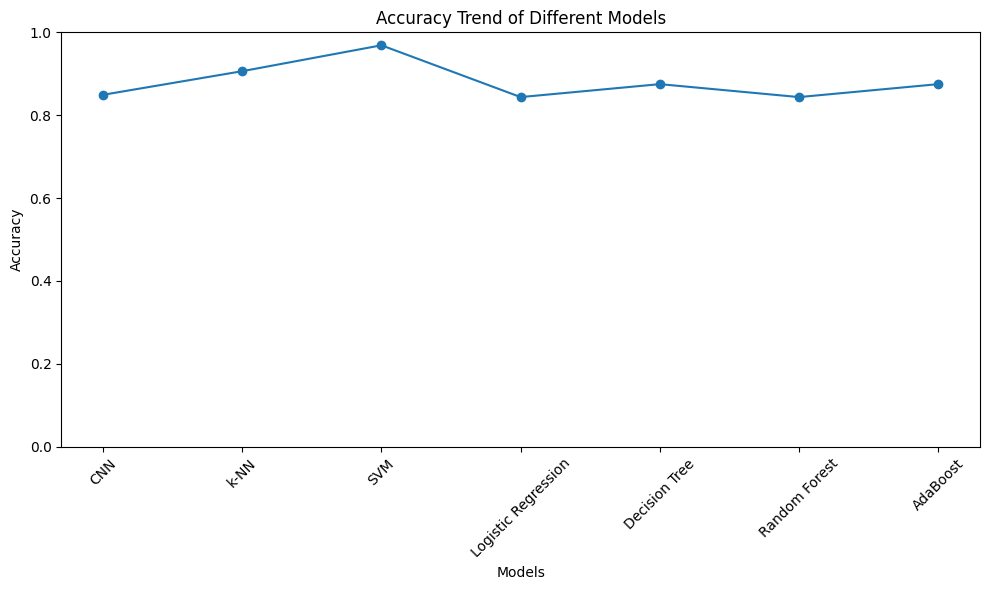

In [12]:
# Define a batch size for predictions
batch_size = 8

# Initialize lists to store model names and accuracies
model_names = []
accuracies = []

# Define your models
models = {
    "CNN": cnn_model,  # Assuming you have already defined cnn_model
    "k-NN": knn_model,
    "SVM": svm_model,
    "Logistic Regression": logistic_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": rf_model,
    "AdaBoost": adaboost_model
}

# Loop through the models dictionary and calculate metrics
for name, model in models.items():
    if name == "CNN":
        try:
            # Evaluate CNN model accuracy
            cnn_accuracy = cnn_model.evaluate(validation_generator)[1]
            model_names.append(name)
            accuracies.append(cnn_accuracy)
        except Exception as e:
            print(f"Error evaluating CNN model: {e}")
    else:
        predictions = []
        true_labels = []
        try:
            for _ in range(len(validation_generator)):
                X_val, y_val = next(validation_generator)
                preds = model.predict(X_val.reshape(-1, 100*100*3))
                predictions.extend(preds)
                true_labels.extend(y_val)
                if len(predictions) >= batch_size:
                    break
            predictions = np.round(predictions).astype(int)
            accuracy = accuracy_score(true_labels, predictions)
            model_names.append(name)
            accuracies.append(accuracy)
        except Exception as e:
            print(f"Error calculating accuracy for {name}: {e}")


# Plot accuracy trend for all models
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Trend of Different Models')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

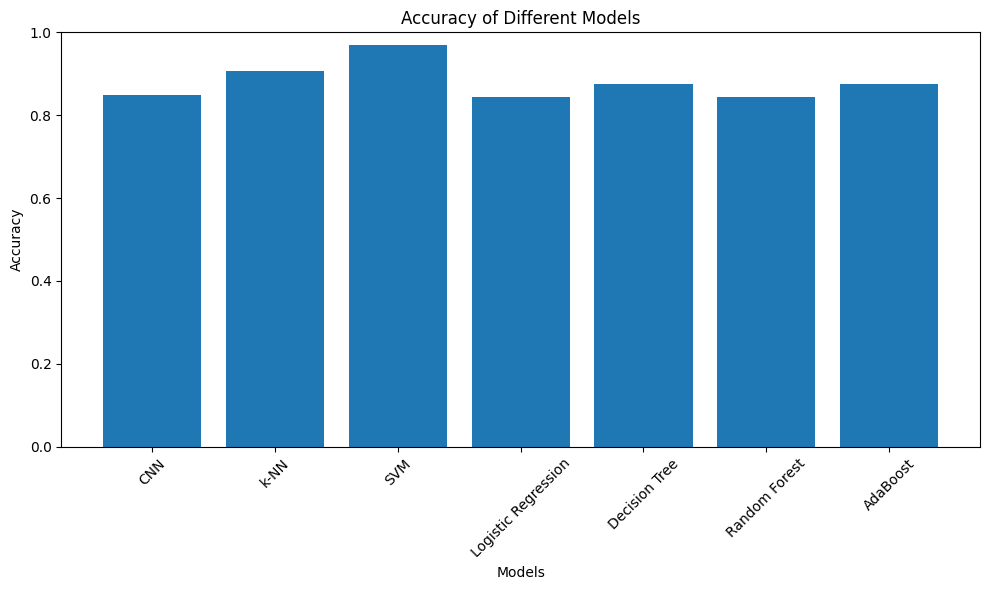

In [13]:
# Plot accuracy for all models
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
k-NN Accuracy: 0.96875
k-NN Precision: 0.96875


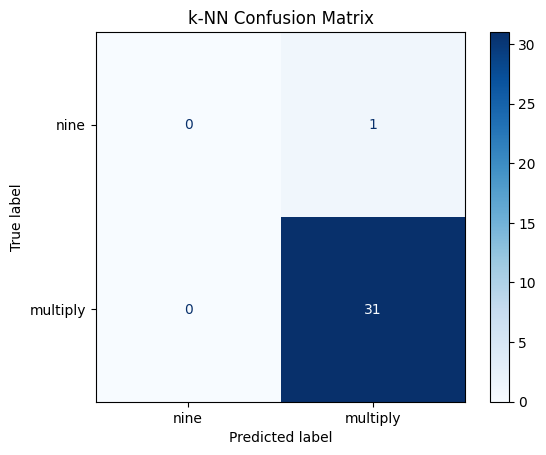

SVM Accuracy: 0.875
SVM Precision: 0.875


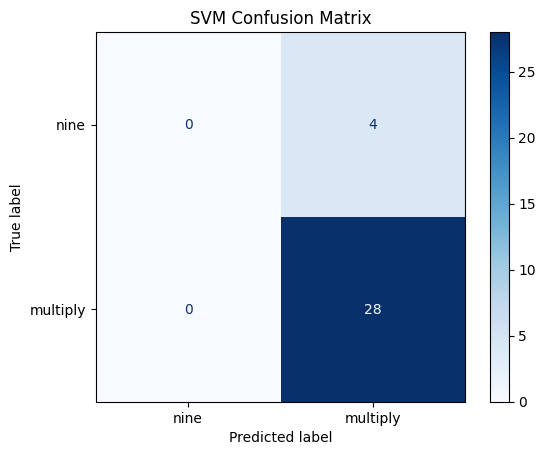

Logistic Regression Accuracy: 0.96875
Logistic Regression Precision: 0.96875


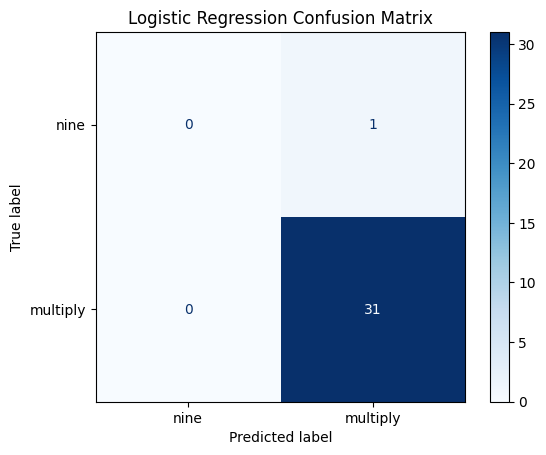

Decision Tree Accuracy: 0.90625
Decision Tree Precision: 0.9354838709677419


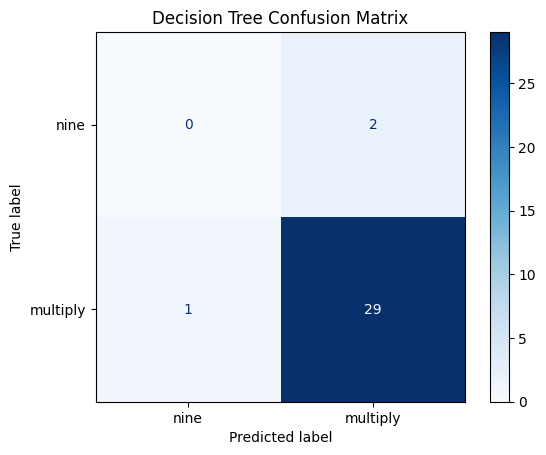

Random Forest Accuracy: 0.78125
Random Forest Precision: 0.78125


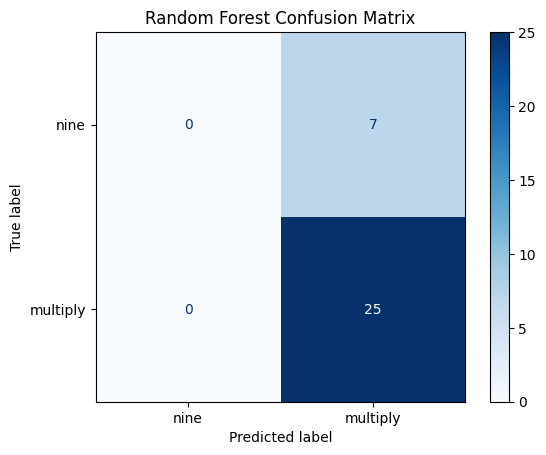

AdaBoost Accuracy: 0.96875
AdaBoost Precision: 0.96875


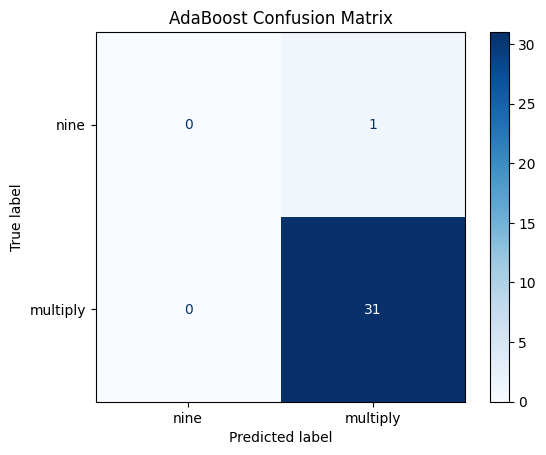

In [14]:
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Define class names based on the directories containing test data
class_names = ["nine", "multiply"]

# Make predictions on validation data for classification models only
batch_size = 8  # Define a smaller batch size for prediction

models = {
    "CNN": cnn_model,
    "k-NN": knn_model,
    "SVM": svm_model,
    "Logistic Regression": logistic_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": rf_model,
    "AdaBoost": adaboost_model
}

for name, model in models.items():
    if name == "CNN":
        predictions = model.predict(validation_generator)
        predictions = (predictions > 0.5).astype(int) 
    else:
        predictions = []
        true_labels = []
        for _ in range(len(validation_generator)):
            X_val, y_val = next(validation_generator)
            preds = model.predict(X_val.reshape(-1, 100*100*3))
            predictions.extend(preds)
            true_labels.extend(y_val)
            if len(predictions) >= batch_size:
                break
        accuracy = accuracy_score(true_labels, predictions)
        # Calculate precision with a suitable average parameter
        precision = precision_score(true_labels, predictions)
        print(f"{name} Accuracy: {accuracy}")
        print(f"{name} Precision: {precision}")

        # Confusion Matrix
        cm = confusion_matrix(true_labels, predictions)
        
        # Ensure that the number of labels matches the number of classes
        if len(class_names) != cm.shape[0]:
            class_names = [f"Class {i+1}" for i in range(cm.shape[0])]
        
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"{name} Confusion Matrix")
        plt.show()


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8585 - loss: 0.6397
CNN Accuracy: 0.8492672443389893
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
CNN Precision: 0.5063484030589294


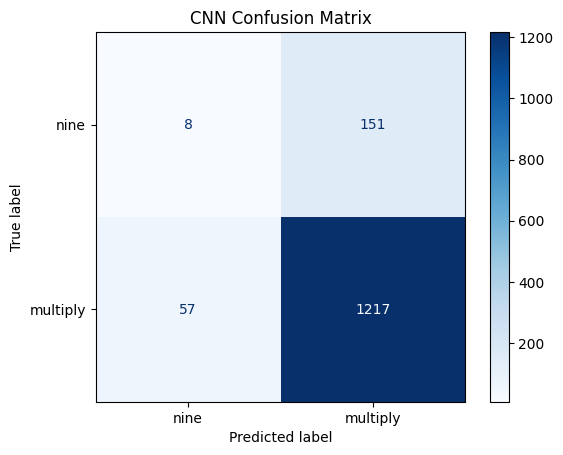

In [15]:
# Evaluate CNN model accuracy
cnn_accuracy = cnn_model.evaluate(validation_generator)[1]
print(f"CNN Accuracy: {cnn_accuracy}")

# Generate predictions for the CNN model for the entire validation set
predictions = cnn_model.predict(validation_generator).flatten()
predictions = np.round(predictions).astype(int)  # Convert probabilities to binary predictions

# Calculate precision
from sklearn.metrics import precision_score
precision = precision_score(validation_generator.labels, predictions, average='macro')  # Choose the appropriate average parameter
print(f"CNN Precision: {precision}")

# Generate and plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class_labels = ["nine", "multiply",]  # Your class labels

cm = confusion_matrix(validation_generator.labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("CNN Confusion Matrix")
plt.show()


In [16]:
# Initialize lists to store model names and classification reports
model_names = []
classification_reports = []

# Loop through the models dictionary and calculate classification reports
for name, model in models.items():
    if name == "CNN":
        try:
            # Load validation data for CNN model
            X_val, y_val = next(validation_generator)
            
            # Make predictions using the CNN model
            predictions = cnn_model.predict(X_val).flatten()
            predictions_binary = (predictions > 0.5).astype(int)
            
            # Calculate classification report
            report = classification_report(y_val, predictions_binary, target_names=["Class 0", "Class 1",])
            
            model_names.append(name)
            classification_reports.append(report)
        except Exception as e:
            print(f"Error generating classification report for {name}: {e}")
    else:
        predictions = []
        true_labels = []
        try:
            for _ in range(len(validation_generator)):
                X_val, y_val = next(validation_generator)
                preds = model.predict(X_val.reshape(-1, 100*100*3))
                predictions.extend(preds)
                true_labels.extend(y_val)
                if len(predictions) >= batch_size:
                    break
            predictions = np.round(predictions).astype(int)
            
            # Calculate classification report
            report = classification_report(true_labels, predictions, target_names=["Class 0", "Class 1",])
            
            model_names.append(name)
            classification_reports.append(report)
        except Exception as e:
            print(f"Error generating classification report for {name}: {e}")

# Print classification reports for all models
for name, report in zip(model_names, classification_reports):
    print(f"Model: {name}")
    print(report)
    print("\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Model: CNN
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00         3
     Class 1       0.90      0.97      0.93        29

    accuracy                           0.88        32
   macro avg       0.45      0.48      0.47        32
weighted avg       0.82      0.88      0.85        32



Model: k-NN
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00         3
     Class 1       0.91      1.00      0.95        29

    accuracy                           0.91        32
   macro avg       0.45      0.50      0.48        32
weighted avg       0.82      0.91      0.86        32



Model: SVM
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00         5
     Class 1       0.84      1.00      0.92        27

    accuracy                           0.84        32
   macro avg       0.42      0.50      0.46        3

C:\Users\P.NIVEDH REDDY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\P.NIVEDH REDDY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\P.NIVEDH REDDY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [20]:
import os
from tensorflow.keras.preprocessing import image

# Define class labels
class_labels = ["nine", "multiply"]

# Prediction code for new images
new_image_path = input("Enter the path of the image you want to predict: ")

# Check if the file exists before attempting to load it
if os.path.exists(new_image_path):
    img = image.load_img(new_image_path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize the image

    for name, model in models.items():
        if name == "CNN":
            prediction = model.predict(x)
        else:
            prediction = model.predict(x.reshape(-1, 100*100*3))
        
        # Convert the numeric prediction to class labels
        label_index = np.argmax(prediction)
        label = class_labels[label_index]
        print(f"{name} Prediction: {label}")
else:
    print("The specified file does not exist.")


Enter the path of the image you want to predict:  C:\Users\P.NIVEDH REDDY\Downloads\archive (7)\final_symbols_split_ttv\test\nine\nine_927.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
CNN Prediction: nine
k-NN Prediction: nine
SVM Prediction: nine
Logistic Regression Prediction: nine
Decision Tree Prediction: nine
Random Forest Prediction: nine
AdaBoost Prediction: nine
